# WiDS Datathon -- Data Exploration
Areerat Kichkha

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# The path to our CSV file
file_to_load = "Resources/TrainingWiDS2021.csv"


In [3]:
# Read our TrainingWiDS2021 data into pandas as a DataFrame
diabetes = pd.read_csv(file_to_load)
diabetes


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
130153,130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,...,NaN,NaN,0,0,0,0,0,0,0,0
130154,130155,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,...,163.0,163.0,0,0,0,0,0,0,0,1
130155,130156,222562,170,81.0,24.408579,0,Caucasian,M,185.4,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
# A list of all of our columns for easy references
list(diabetes.columns)

['Unnamed: 0',
 'encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate

## Exploring missing values in R, with `mice`.  

The missing data analysis from `mice` suggests variables to be removed due to lack of predictability, or possibly replaced with imputation if they are less than 10%.  Missing data statistical packages give answers that are independent of helathcare knowledge.  Any conflicts from the expectations of healthcare doctors and the statistical results tell us about the quality of data of those variables to be improved in the data collection process.  

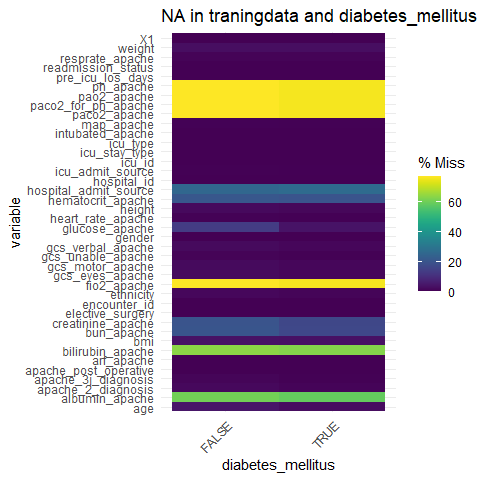

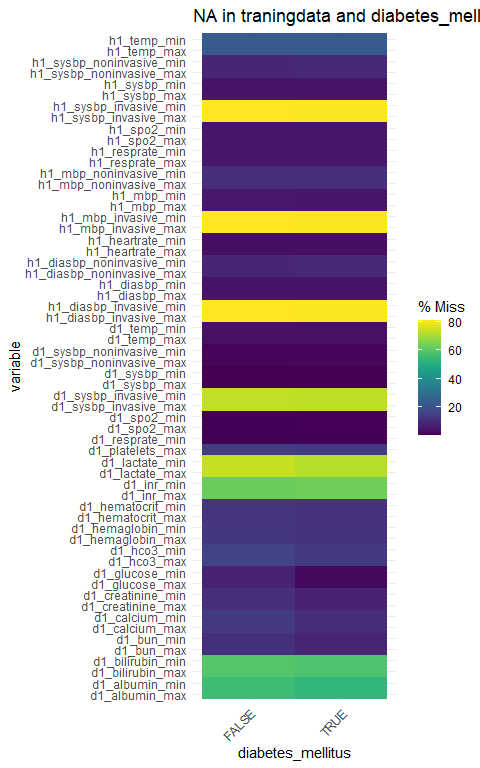

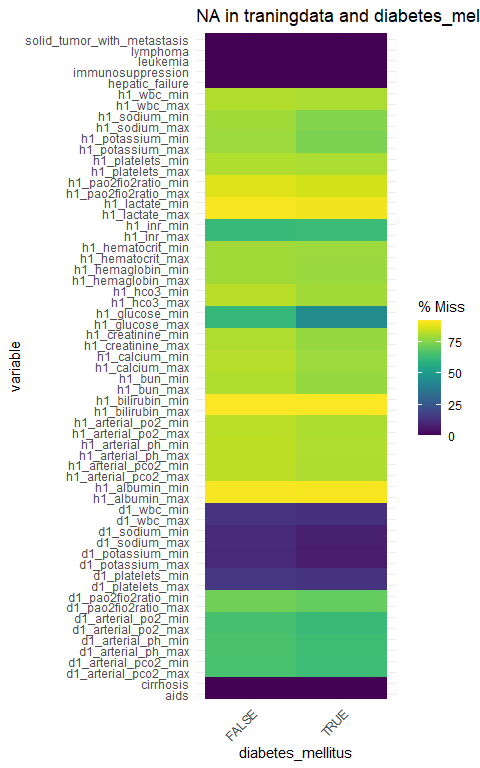


Group Omit is the ones `mice` suggested removing because correlation of missingness between variables as compared to the prediction does not change so they are effectively constant if they are missing more than 5% of data.  The yellow ones were missing 80% or more. (See the heat maps above) 

Let's look at Group Omit correlations with the predicted variable, Diabetes Mellitus.  They are merely non-correlated, less than 10%.  Thus, we may drop them.

In [5]:
#Group Omit variables and predicted variable, diabetes_mellitus 
Group_Omit = diabetes.loc[:,['ph_apache',
'paco2_for_ph_apache',
'paco2_apache',
'fio2_apache',
'd1_mbp_invasive_min',
'd1_mbp_invasive_max',
'h1_sysbp_invasive_max',
'h1_sysbp_invasive_min',
'h1_mbp_invasive_max',
'h1_mbp_invasive_min',
'h1_diasbp_invasive_max',
'h1_diasbp_invasive_min',
'h1_lactate_max',
'h1_lactate_min',
'h1_bilirubin_max',
'h1_bilirubin_min',
'h1_albumin_max',
'h1_albumin_min',
 'diabetes_mellitus']] 

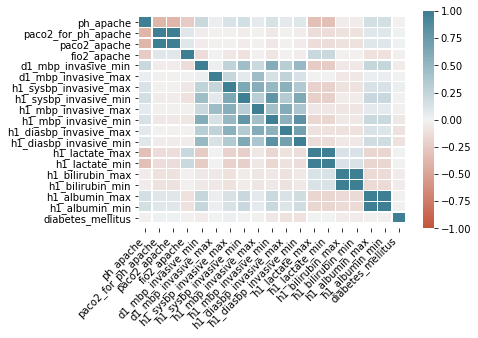

In [6]:
#Correlation Matrix plots
corr = Group_Omit.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    linewidths=0.5,
    #annot=True, 
    fmt=".3f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',    
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
;

# Save Figure
plt.savefig("Images/GroupOmit_Correlation_Matrix.png", figsize=(20,24))

# Show plot
plt.show()

Group Potential is all the variables relevant to predicton if someone in the ICU is diabetic as some of their bivariate plots of missingness show stronger contrasting colors.

Let's look at Group Potential correlations with the predicted variable, Diabetes Mellitus.  The  correlations are stronger, as compared to Group Omit, though still weak.  Two strongest correlations in this group are from d1_glucose_max correlation, 40.1%, and glucose_apache, 35.4%.  However, these two variables are highly correlated, 92%.  Given that d1_gluose_max has better quality data and higher correlation, we may select only d1_glucose_max if needed.   

In [7]:
#Group Potential variables and predicted variable, diabetes_mellitus 
Group_Potential = diabetes.loc[:,['urineoutput_apache',
'glucose_apache',
#'creatine_apache',
'bun_apache',
'd1_lactate_min',
'd1_lactate_max',
'd1_glucose_min',
'd1_glucose_max',
'd1_creatinine_min',
'd1_creatinine_max',
'd1_calcium_min',
'd1_calcium_max', 
'diabetes_mellitus']]

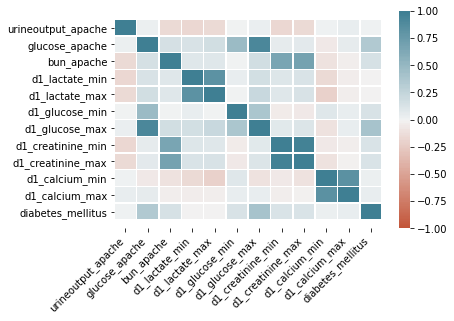

In [8]:
#Correlation Matrix plots
corr = Group_Potential.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    linewidths=0.5,
    #annot=True, 
    fmt=".3f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',    
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
;

# Save Figure
plt.savefig("Images/GroupPotential_Correlation_Matrix.png", figsize=(20,24))

# Show plot
plt.show()

#### Importance Map

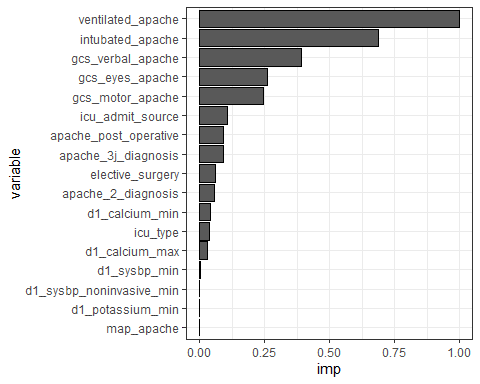

These variables are the factors for why certain variables to be missing not at random.  Specifically, the causes of these missing were issues and circumstances when these factors equal the values given above and when the proportionality of missingness is greater than 50%.  This is where we may need to talk with a domain expert and see whether these situations will help improve chances for the domain experts to indentify diabetics admitted to ICU without knowing their medical history in order to save them in time.


Let's look at Group Non-random correlation with the predicted variable, Diabetes Mellitus. They are again merely non-correlated, less than 10%. Thus, we may consider dropping them despite the non-random nature.

In [9]:
#Group Non-random variables and predicted variable, diabetes_mellitus 
Group_Non_random = diabetes.loc[:,['elective_surgery',
'icu_admit_source',
'icu_type',
'apache_3j_diagnosis',
'apache_post_operative',
'gcs_eyes_apache',
'gcs_verbal_apache',
'intubated_apache',
'map_apache',
'ventilated_apache',
'd1_sysbp_min',
'd1_sysbp_noninvasive_min',
'd1_calcium_max',
'd1_calcium_min',
'd1_potassium_min',
'diabetes_mellitus']]


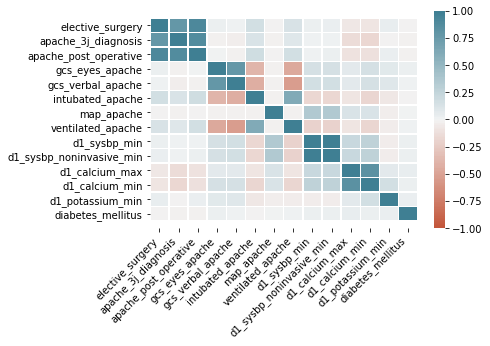

In [10]:
#Correlation Matrix plots
corr = Group_Non_random.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    linewidths=0.5,
    #annot=True, 
    fmt=".3f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',    
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
;

# Save Figure
plt.savefig("Images/GroupNonRandom_Correlation_Matrix.png", figsize=(20,24))

# Show plot
plt.show()

#### Missing Data Patterns

The decision tree below shows missing data patterns, horizontal observed in rows.  Given correlation results above, we have considered dropping most variables with missing data after imputation.  However, as some variables may be needed according to domain experts, we may need to take into account the missing data patterns.

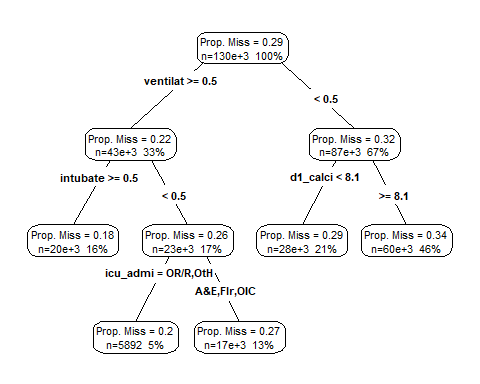

### Summary

A possible relevant variable with high missing values is d1_glucose_max.  A quick caution from a domain expert is that d1_glucose_max may be high among non-diabetic patients given the circumstances of admissions to an ICU.

Principled missing data methods for researchers by Yiran Dong and Chao-Ying Joanne Peng, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/, mentions the following:

"The proportion of missing data is directly related to the quality of statistical inferences. Yet, there is no established cutoff from the literature regarding an acceptable percentage of missing data in a data set for valid statistical inferences. For example, Schafer ( 1999 ) asserted that a missing rate of 5% or less is inconsequential. Bennett ( 2001 ) maintained that statistical analysis is likely to be biased when more than 10% of data are missing. Furthermore, the amount of missing data is not the sole criterion by which a researcher assesses the missing data problem. Tabachnick and Fidell ( 2012 ) posited that the missing data mechanisms and the missing data patterns have greater impact on research results than does the proportion of missing data."

Thus, bias measures will be discussed.